Challenge
The Big 5 Personality Traits have widely been held to affect general behaviour and more recently, consumer choices. Marketers have begun to tailor advertisements based on a person’s known dominant personality traits. Research is, however, not very conclusive on findings. The following is an analysis using Unsupervised Machine Learning Techniques to determine whether personality traits and HULT DNA Competencies have an effect on consumers’ decision to purchase a MAC or Windows device. The sample consisted of 147 postgraduate business analytics students from Hult International Business School with diverse backgrounds.

#Assumptions
The Big 5 Personality Traits have been tested and proven to be true
The known Big 5 correctly categorizes personality traits
That the HULT DNA Competencies have been tested and proven to be true
The HULT DNA framework categorizes competencies and skills correctly
Responses collected from the survey are free from social desirability and other biases

#Hypotheses
Big Five Personality Traits affect consumer purchase behaviour
HULT DNA Competencies affects consumer purchase behaviour

#Strategy
The sample data includes different kinds of data (demography, purchase behaviour, HULT DNA and personality traits). There are also duplicate variables and reversed scales within the data set. These are used for survey (response) validation after which we drop duplicates and untrusted responses. We also group HULT DNA and Big 5 Traits into their various groups to reduce the dimensions of the data set for efficient analysis.
We begin by loading the data and required packages. We then inspect, clean and subset data into various categories. We undertake feature engineering based on dummy variables, price sensitivity, consumer satisfaction and the like. Finally, we run PCA and cluster analyses on standardized data, create personas based on correlation matrices, undertake visual data analysis on impact of dummy variables and then  draw conclusions.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans

In [61]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [110]:
df = pd.read_excel('survey_data.xlsx',index_col='surveyID')

In [111]:
#survey validation loop
place_holder_lst = []

for index, col in df.iterrows():
    if(abs(df.loc[index, 'Respond effectively to multiple priorities'] - df.loc[index, 'Respond effectively to multiple priorities.1']) > 1 or
       abs(df.loc[index,"Take initiative even when circumstances, objectives, or rules aren't clear"] - df.loc[index,"Take initiative even when circumstances, objectives, or rules aren't clear.1"]) > 1 or
       abs(df.loc[index,'Encourage direct and open discussions'] - df.loc[index,'Encourage direct and open discussions.1']) > 1):
       place_holder_lst.append(index)
    else: 
        continue
           
bad_surveys = df.loc[place_holder_lst]
df.drop(place_holder_lst, axis=0, inplace=True)
df.drop(['Respond effectively to multiple priorities.1', 
         "Take initiative even when circumstances, objectives, or rules aren't clear.1",
         "Encourage direct and open discussions.1"], axis=1 ,inplace=True)


In [112]:
# Reverse Q for hult dna=========================
df["Reversed Don't generate ideas that are new and different"] = 0
df["Reversed Don't persuasively sell a vision or idea"] = 0
df["Reversed Can't rally people on the team around a common goal"] = 0
place_holder_lst = ["Don't  generate ideas that are new and different",
                    "Don't persuasively sell a vision or idea",
                    "Can't rally people on the team around a common goal"]
results_lst = {"Don't  generate ideas that are new and different":[],
               "Don't persuasively sell a vision or idea":[],
               "Can't rally people on the team around a common goal":[]}
for col in place_holder_lst:
    for index , c in df.iterrows():
        x = df.loc[index, col]
        results_lst[col].append(5-(x-1))
for key, value in results_lst.items():
    df["Reversed " + key] = value
df.drop(place_holder_lst, axis = 1, inplace = True)

In [113]:
# big 5 grouping=======================
results_lst = {'Extroversion':[],
               'Agreeableness':[],
               'Conscientiousness':[],
               'Neuroticism':[],
               'Openness to Experience':[]}

for index, row in enumerate(df.iterrows()):
    results_lst['Extroversion'].append(20 + df.iloc[index, 1] - df.iloc[index, 6] + df.iloc[index, 11]
                                          - df.iloc[index, 16] + df.iloc[index, 21] - df.iloc[index, 26]
                                          + df.iloc[index, 31] - df.iloc[index, 36] + df.iloc[index, 41]
                                          - df.iloc[index, 46])
    results_lst['Agreeableness'].append(14 - df.iloc[index, 2] + df.iloc[index, 7] - df.iloc[index, 12]
                                          + df.iloc[index, 17] - df.iloc[index, 22] + df.iloc[index, 27]
                                          - df.iloc[index, 32] + df.iloc[index, 37] + df.iloc[index, 42]
                                          + df.iloc[index, 47])
    results_lst['Conscientiousness'].append(14 + df.iloc[index, 3] - df.iloc[index, 8] + df.iloc[index, 13]
                                          - df.iloc[index, 18] + df.iloc[index, 23] - df.iloc[index, 28]
                                          + df.iloc[index, 33] - df.iloc[index, 38] + df.iloc[index, 43]
                                          + df.iloc[index, 48])
    results_lst['Neuroticism'].append(38 - df.iloc[index, 4] + df.iloc[index, 9] - df.iloc[index, 14]
                                          + df.iloc[index, 19] - df.iloc[index, 24] - df.iloc[index, 29]
                                          - df.iloc[index, 34] - df.iloc[index, 39] - df.iloc[index, 44]
                                          - df.iloc[index, 49])
    results_lst['Openness to Experience'].append(8 + df.iloc[index, 5] - df.iloc[index, 10] + df.iloc[index, 15]
                                          - df.iloc[index, 20] + df.iloc[index, 25] - df.iloc[index, 30]
                                          + df.iloc[index, 35] + df.iloc[index, 40] + df.iloc[index, 45]
                                          + df.iloc[index, 50])
    
df['Extroversion']              = results_lst['Extroversion']
df['Agreeableness']             = results_lst['Agreeableness']
df['Conscientiousness']         = results_lst['Conscientiousness']
df['Neuroticism']               = results_lst['Neuroticism']
df['Openness to Experience']    = results_lst['Openness to Experience']


In [114]:
df.head()

df.isnull().any().sum()

df.info()
df.describe()

x = df['What is your nationality? '].tolist()
for i in range(0,len(x)):
    x[i] = x[i].lower()
    x[i] = x[i].strip()
df['What is your nationality? '] = x

#Sorting Nationalities into Rich and non-rich Countries

df['What is your nationality? '].values
df['Nationality_split'] = 0
placeholder_list = []
rich_country_list = ["belgian","swiss","usa","german","norwegian","british","belarus","italian","spain","spanish","russian","american"]

for i in range(0,len(x)):
    if x[i] in rich_country_list :
        placeholder_list.append(1)
    else : 
        placeholder_list.append(0)

df['Nationality_split'] = placeholder_list





#converting the categorical data into numerical data

df1 = pd.get_dummies(df['What laptop do you currently have?'],prefix="Have")
df = df.join(df1)

df1 = pd.get_dummies(df['What laptop would you buy in next assuming if all laptops cost the same?'], prefix = "Want")
df = df.join(df1)

df1 = pd.get_dummies(df['Gender'],prefix="cleaned")
df = df.join(df1)


#checking the frequencies of laptop owners and what they want
df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()

df['What laptop do you currently have?'].value_counts()


#Converting the categorical program values into numerical
df["What program are you in?"].value_counts()

df['MIB'] = 0
df['MBA'] = 0
df['MBAN'] = 0
df['DI'] = 0

placeholder_list_MIB = []
placeholder_list_MBAN = []
placeholder_list_MBA = []
placeholder_list_MDI = []

x = df['What program are you in?'].tolist()

for i in range(0,len(x)):
    if "DD (MIB & Business Analytics)" in x[i]:
        placeholder_list_MIB.append(1)
        placeholder_list_MBAN.append(1)
        placeholder_list_MBA.append(0)
        placeholder_list_MDI.append(0)
        
    elif "DD (MBA & Business Analytics)" in x[i]:
        placeholder_list_MIB.append(0)
        placeholder_list_MBAN.append(1)
        placeholder_list_MBA.append(1)
        placeholder_list_MDI.append(0)
    elif "One year Business Analytics " in x[i]:
        placeholder_list_MIB.append(0)
        placeholder_list_MBAN.append(1)
        placeholder_list_MBA.append(0)
        placeholder_list_MDI.append(0)
    else :
        placeholder_list_MIB.append(0)
        placeholder_list_MBAN.append(0)
        placeholder_list_MBA.append(1)
        placeholder_list_MDI.append(1)



df['MIB'] = placeholder_list_MIB
df['MBA'] = placeholder_list_MBA
df['MBAN'] = placeholder_list_MBAN
df['DI'] = placeholder_list_MDI


#Creating new columns to denote the Loyal Customer, The Unhappy Customer, The potential Customer

df['price_sensitive_consumer'] = 0
df['unhappy_consumer'] = 0
df['loyal_consumer'] = 0

x = df['What laptop do you currently have?'].tolist()
y = df['What laptop would you buy in next assuming if all laptops cost the same?'].tolist()

place_loyal=[]
place_unhappy = []
place_price = []


for i in range(0,len(x)):
    if "Macbook" in x[i] and "Macbook" in y[i]:
        place_loyal.append(1)
    else: 
        place_loyal.append(0)

    
for i in range(0,len(x)):
    if "Macbook" in x[i] and ("Windows laptop" in y[i] or "Chromebook" in y[i]):
        place_unhappy.append(1)
    else: 
        place_unhappy.append(0)
    
for i in range(0,len(x)):
    if ("Windows laptop" in x[i] or "Chromebook" in x[i]) and "Macbook" in y[i]:
        place_price.append(1)
    else: 
        place_price.append(0)


df['price_sensitive_consumer'] = place_price
df['unhappy_consumer'] = place_unhappy
df['loyal_consumer'] = place_loyal



<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, a1000 to a1146
Data columns (total 81 columns):
Am the life of the party                                                      139 non-null int64
Feel little concern for others                                                139 non-null int64
Am always prepared                                                            139 non-null int64
Get stressed out easily                                                       139 non-null int64
Have a rich vocabulary                                                        139 non-null int64
Don't talk a lot                                                              139 non-null int64
Am interested in people                                                       139 non-null int64
Leave my belongings around                                                    139 non-null int64
Am relaxed most of the time                                                   139 non-null int64
Have difficulty under

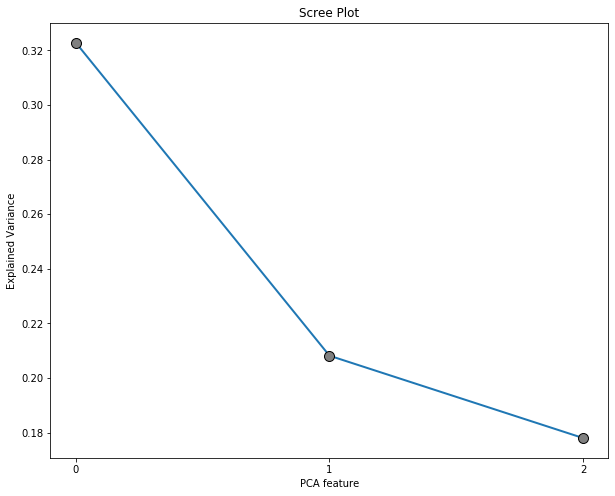

In [115]:
#PCA big 5 reduced
           
big5_df= df.loc[:,['Extroversion','Agreeableness','Conscientiousness', 'Neuroticism','Openness to Experience']]
scaler=StandardScaler()
scaler.fit(big5_df)
scaled_data_big5=pd.DataFrame(scaler.transform(big5_df))
scaled_data_big5.columns=big5_df.columns
pca=PCA(n_components=3,
       random_state=222)
big5_pca=pca.fit_transform(scaled_data_big5)
scree_plot(pca_object=pca)
factor_loadings_big5= pd.DataFrame(pd.np.transpose(pca.components_))
factor_loadings_big5 = factor_loadings_big5.set_index(scaled_data_big5.columns)
factor_loadings_big5.columns = ['Artist','Lone wolf','Alfred']

In [ ]:
#Personas
0. Artist
This is an extrovert, always ready to help and interesting in people around, but this person also struggles with difficult situations and gets stressed easily. This is an artist, who enjoys spending time with others and makes friends easily. This person cares what others think about him and is creative and imaginative. It is a creative person, who enjoys trying new things and always comes up with new ideas. His conscientiousness is quite superficial, so 
this person is not organized sometimes very well and becomes impulsive.

1. Lone wolf
An Introverted person, who is self-centred and often does not forgive mistakes. But at the same time it is a person that is very conscientious, open for new experiences and creative in problem solving. This person is not a team-player that makes it difficult to work with other people. 

2.Alfred
This introverted person likes to keep in the background and not attract too much attention. He likes things as they are and a stable environment. Yet he is always ready to help others and will work hard to achieve his goals. This person is good worker and prefer do things in a familiar way


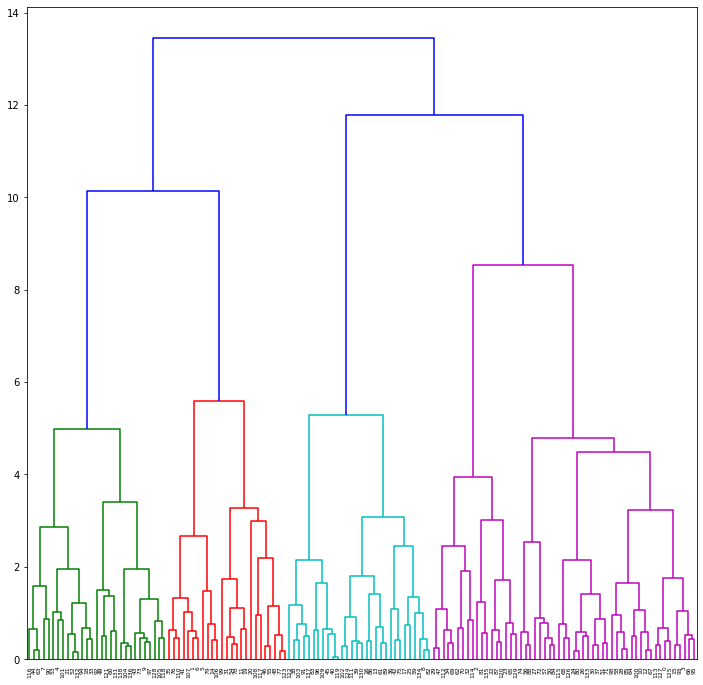

In [117]:
#Custering for big 5 reduced ================================================
big5_pca_components = pd.DataFrame(big5_pca)

scaler=StandardScaler()
scaler.fit(big5_pca_components)
scaled_components_big5=pd.DataFrame(scaler.transform(big5_pca_components))
scaled_components_big5.columns=big5_pca_components.columns

standard_mergings_ward = linkage(y = scaled_components_big5,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

In [118]:
big5_k_pca = KMeans(n_clusters = 3,
                        random_state = 222)


# fitting the object to the data
big5_k_pca.fit(scaled_components_big5)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': big5_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    52
2    50
1    37
Name: Cluster, dtype: int64


In [119]:
centroids_pca = big5_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Artist','Lone wolf','Alfred']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)


,Artist,Lone wolf,Alfred
0,-0.07,0.57,-0.84
1,-1.10,-0.50,0.44
2,0.89,-0.23,0.55


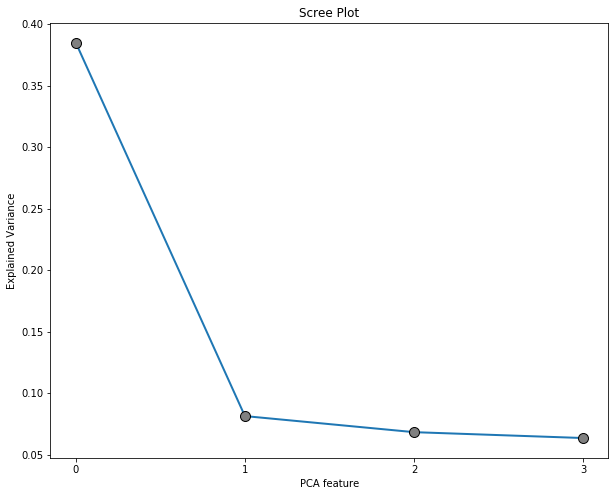

In [67]:
# PCA hult DNA ==================================
hultDNA_df = pd.concat([df.iloc[:,50:65], df.loc[:,["Reversed Don't generate ideas that are new and different",
                                                    "Reversed Don't persuasively sell a vision or idea",
                                                    "Reversed Can't rally people on the team around a common goal"]]],
                                                    axis = 1)

scaler = StandardScaler()
scaler.fit(hultDNA_df)
scaled_hultDNA = pd.DataFrame(scaler.transform(hultDNA_df))
scaled_hultDNA.columns = hultDNA_df.columns

pca = PCA(n_components = 4,
         random_state = 222)

hultDNA_pca = pca.fit_transform(scaled_hultDNA)

scree_plot(pca_object = pca)

factor_loadings_hultDNA = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings_hultDNA = factor_loadings_hultDNA.set_index(scaled_hultDNA.columns)


In [68]:
factor_loadings_hultDNA

,0,1,2,3
See underlying patterns in complex situations,-0.230340,0.176919,0.108044,0.034353
Demonstrate an awareness of personal strengths and limitations,-0.222063,-0.078669,0.283521,0.232287
Display a growth mindset,-0.265444,-0.067771,0.179159,0.311276
Respond effectively to multiple priorities,-0.276860,0.030932,0.344662,-0.065706
"Take initiative even when circumstances, objectives, or rules aren't clear",-0.269521,0.169672,0.230595,0.031088
Encourage direct and open discussions,-0.277622,0.100396,0.208190,0.329447
Listen carefully to others,-0.170231,-0.411266,-0.500410,0.235027
Build cooperative relationships,-0.272319,-0.122265,-0.167335,0.227497
Work well with people from diverse cultural backgrounds,-0.281895,-0.112058,-0.362177,0.153443
"Effectively negotiate interests, resources, and roles",-0.285396,0.095591,-0.052406,-0.131644
